#### Importing image and modules

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [85]:
img = plt.imread(r'C:\Users\Anish Tondchirkar\Coding\Data Science and ML\PROJECTS\Image compression\Data\flower.jpg')

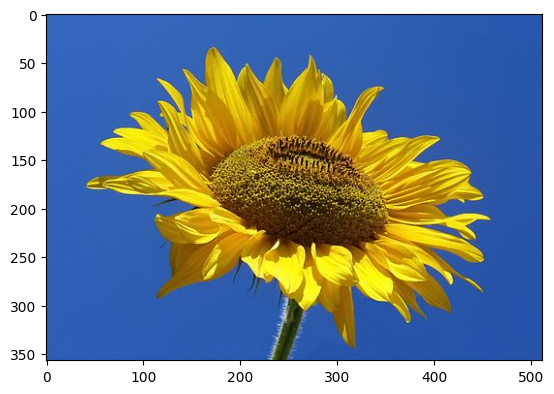

In [86]:
plt.imshow(img)

In [87]:
img.shape

(357, 512, 3)

In [88]:
w,h,d = img.shape

In [89]:
img.size

548352

In [90]:
pixels = img.reshape(-1, 3)  # Reshape to a list of pixels
pixels.shape

(182784, 3)

In [91]:
print(pixels)

[[ 55 105 192]
 [ 55 105 192]
 [ 55 105 192]
 ...
 [ 38  83 168]
 [ 38  83 168]
 [ 38  83 168]]


In [92]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=7,n_init=10)
    kmean.fit(pixels)
    wcss.append(kmean.inertia_)

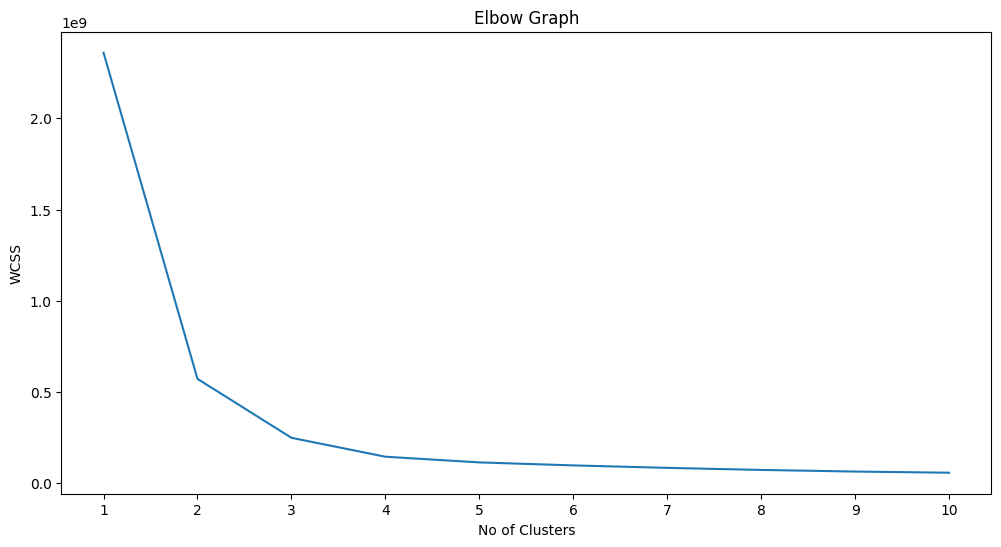

In [93]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.xticks(np.arange(1,11))
plt.title("Elbow Graph")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [94]:
#optimal clusters are 3
kmean = KMeans(n_clusters=16,init='k-means++',random_state=0)
label = kmean.fit_predict(pixels)
label.shape

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(182784,)

In [95]:
c = kmean.cluster_centers_
print(c)

[[ 50.85878698  98.34072097 182.2838021 ]
 [165.69592134 139.45520757  55.84195193]
 [249.42416918 233.72522659  27.83776435]
 [ 85.85024054  55.55469567  10.21899184]
 [186.052257   139.27395925   4.91342498]
 [ 42.06452263  88.34605902 170.88103397]
 [130.4307765   90.84391243   8.28177666]
 [108.72870507 104.25012309  70.30083703]
 [230.94354839 199.00144009  20.16949885]
 [ 52.5652016   27.52324737   3.21249546]
 [250.10572687 236.12303335  72.53587162]
 [ 67.23858565  86.67627875 119.25883968]
 [160.28529823 115.28075489   5.72122554]
 [147.45806452 164.33548387 164.        ]
 [205.20315928 182.13207547  82.72180781]
 [207.92238573 165.69709598  10.94882146]]


In [96]:
# Function to create the compressed image
def compress(c,label,w,h,d):
    comp_img = np.zeros((w,h,d))
    l_ix = 0
# loop logic : 
# label[l_ix]: Retrieves the cluster label assigned to the current pixel, 
# identified by the index l_ix.
# c[label[l_ix]]: Uses this label to access the corresponding centroid (color) from the array c, 
# which stores all centroids
    for i in range(w):
        for j in range(h):
            comp_img[i][j] = c[label[l_ix]]
            l_ix+=1
    return comp_img

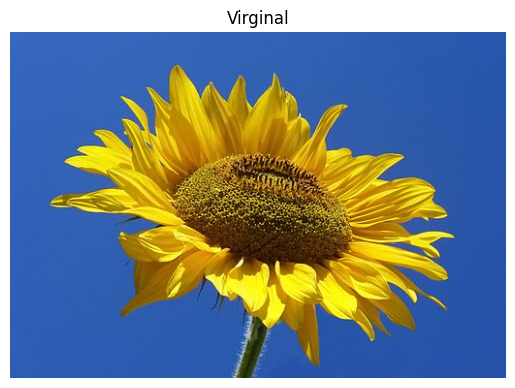

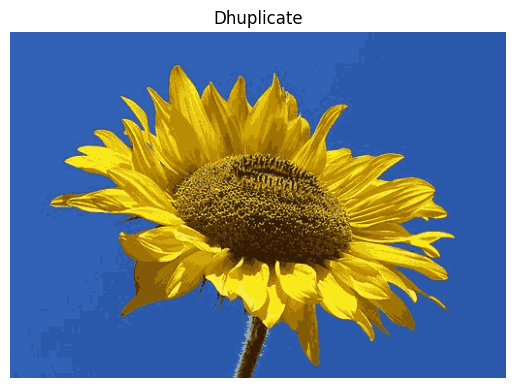

In [97]:
plt.figure(1)

plt.title("Virginal")

plt.axis('off')

plt.imshow(img)

plt.figure(2)

plt.title("Dhuplicate")

plt.axis('off')

plt.imshow(compress(c,label,w,h,d).astype(np.uint8))